In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
titanic = sns.load_dataset('titanic')
titanic.info()

print(dir(titanic))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '_

In [13]:
#필요한 컬럼 골라내기
df = titanic[['age', 'sex', 'class', 'fare', 'survived']]
print(df.head())

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [15]:
grouped = df.groupby(['class'])
print(grouped)

In [24]:
#key에는 그룹화된 컬럼의 값이 전달되고 group에는 그룹화된 데이터가 전달됩니다.
for key, group in grouped:
    print(key, group)

First       age     sex  class     fare  survived
1    38.0  female  First  71.2833         1
3    35.0  female  First  53.1000         1
6    54.0    male  First  51.8625         0
11   58.0  female  First  26.5500         1
23   28.0    male  First  35.5000         1
..    ...     ...    ...      ...       ...
871  47.0  female  First  52.5542         1
872  33.0    male  First   5.0000         0
879  56.0  female  First  83.1583         1
887  19.0  female  First  30.0000         1
889  26.0    male  First  30.0000         1

[216 rows x 5 columns]
Second       age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24.0000         1
880  25.0  female  Second  26.

/var/folders/bq/22f7j5dn6x5dcpn8t77q8t4h0000gn/T/ipykernel_99558/2285875496.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped:


In [27]:
#그룹 별 집계 가능
print(grouped.mean())

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363


/var/folders/bq/22f7j5dn6x5dcpn8t77q8t4h0000gn/T/ipykernel_99558/1163390904.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped.mean())


In [30]:
#개별 그룹 가져오기
group1 = grouped.get_group('First')
print(group1.head())

     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


In [32]:
grouped_two = df.groupby(['class', 'sex'])
for key, group in grouped_two:
    print(key)

('First', 'female')
('First', 'male')
('Second', 'female')
('Second', 'male')
('Third', 'female')
('Third', 'male')


In [35]:
#집계 함수 사용
print(grouped.std())
print(grouped['fare'].std())
print(grouped.fare.std()) #.을 이용해서 컬럼에 접근할 때는 컬럼 이름이 반드시 문자열이야 함

              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949
class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64
class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


/var/folders/bq/22f7j5dn6x5dcpn8t77q8t4h0000gn/T/ipykernel_99558/2915112801.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped.std())


In [44]:
#사용자 정의 함수 적용

#group에 agg를 이용해서 적용하게 되면 매개변수로 각 그룹이 대입되는 구조
def f(group):
    return (group.max(), group.min())

#하나의 함수 적용
agg_f = grouped.agg(f)
print(agg_f)

#여러 개의 함수 적용
agg_two = grouped.agg([min, max])
print(agg_two)

#컬럼마다 다른 함수 적용
agg_three = grouped.agg({'fare':max, 'age':min})
print(agg_three)

                 age             sex             fare survived
class                                                         
First   (80.0, 0.92)  (male, female)  (512.3292, 0.0)   (1, 0)
Second  (70.0, 0.67)  (male, female)      (73.5, 0.0)   (1, 0)
Third   (74.0, 0.42)  (male, female)     (69.55, 0.0)   (1, 0)
         age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1
            fare   age
class                 
First   512.3292  0.92
Second   73.5000  0.67
Third    69.5500  0.42


In [49]:
#셀 단위로 함수 적용 - transform이나 apply 사용
def z_score(x):
    return (x-x.mean()) / x.std()

age_zscore = grouped.age.transform(z_score)
print(age_zscore.head())

#SQL의 Having(Grouped By 이후의 조건 - 그룹화한 항목의 필터링)
#을 만들고자 할 때는 filter 함수를 이용
#그룹화 한 항목의 필터링은 그룹의 집계함수를 이용해서 필터링을 수행
#행의 개수가 300개가 넘는 그룹의 데이터만 추출
group_filter = grouped.filter(lambda x: len(x) > 300)
print(group_filter.head())

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [56]:
#print(df)
#2개의 컬럼으로 그룹화 - 멀티인덱스 생성
grouped = df.groupby(['class', 'sex'])

#First 클래스이고 sex가 male인 데이터만 골라오기
gdf = grouped.mean()
print(gdf.loc[('First', 'male')])
print(gdf.xs('male', level='sex'))

age         41.281386
fare        67.226127
survived     0.368852
Name: (First, male), dtype: float64
              age       fare  survived
class                                 
First   41.281386  67.226127  0.368852
Second  30.740707  19.741782  0.157407
Third   26.507589  12.661633  0.135447


In [62]:
print(pd.pivot_table(df, index='sex', columns='class', values='age', aggfunc='mean'))

class       First     Second      Third
sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589


## 서울시 구별 인구수와 CCTV 개수의 탐색

##필요한 라이브러리 import

In [26]:
import pandas as pd
import numpy as np

#시각화 패키지
import matplotlib.pyplot as plt

#시각화를 할 때 한글 출력을 위해서 import
import platform
from matplotlib import font_manager, rc

### 데이터 읽어오기

In [25]:
cctv = pd.read_excel('./data/cctv.xlsx')

In [8]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [27]:
#pop.txt는 처음 두개의 행은 의미가 없습니다.
#한글을 포함
#구분 기호는 탭
#천 단위 구분 기호가 존재

pop = pd.read_csv("./data/pop.txt", skiprows=2, delimiter="\t", thousands=",")

###컬럼 이름 변경

In [29]:
cctv.rename(columns={cctv.columns[0]:"구별"}, inplace=True)
pop.rename(columns={pop.columns[1]:'구별'}, inplace=True)
                    
#cctv의 구이름에는 중간에 공백이 존재하고 pop은 구 이름에는 공백이 없음

gu = []
for x in cctv['구별']:
    gu.append(x.replace(' ', ''))
cctv['구별'] = gu

In [30]:
#pop 데이터에서 기간, 구별, 계, 남자, 여자 열만 필요
pop = pop[['기간', '구별', '계', '남자', '여자']]

#pop 데이터의 첫번째 행은 전체 데이터의 집계라서 불필요
pop.drop([0], inplace=True)

#새로운 열을 추가 - 없는 열 이름에 데이터를 대입하면 됩니다.
pop['여성비율'] = pop['여자'] / pop['계'] * 100

print(pop)

          기간    구별       계      남자      여자       여성비율
1   2021.2/4   종로구  155106   75009   80097  51.640169
2   2021.2/4    중구  132259   64526   67733  51.212394
3   2021.2/4   용산구  240665  116858  123807  51.443708
4   2021.2/4   성동구  295767  143927  151840  51.337708
5   2021.2/4   광진구  355306  170624  184682  51.978295
6   2021.2/4  동대문구  352259  172865  179394  50.926733
7   2021.2/4   중랑구  394679  194556  200123  50.705257
8   2021.2/4   성북구  443206  212849  230357  51.975154
9   2021.2/4   강북구  306093  148824  157269  51.379483
10  2021.2/4   도봉구  322419  156843  165576  51.354294
11  2021.2/4   노원구  520005  250532  269473  51.821232
12  2021.2/4   은평구  479409  229241  250168  52.182583
13  2021.2/4  서대문구  317699  150608  167091  52.594122
14  2021.2/4   마포구  379984  177998  201986  53.156449
15  2021.2/4   양천구  454288  222538  231750  51.013894
16  2021.2/4   강서구  582995  280822  302173  51.831148
17  2021.2/4   구로구  424582  210936  213646  50.319137
18  2021.2/4   금천구  244685  

#데이터 결합

In [32]:
df = pd.merge(cctv, pop, on='구별')
print(df)

      구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1    강동구  1879     303.0  387.0  134.0     59    144    194    273    385   
2    강북구  1265     243.0   88.0  141.0     74    145    254      1    319   
3    강서구  1617     219.0  155.0  118.0    230    187    190    264    254   
4    관악구  3985     430.0   56.0  419.0    487    609    619    694    671   
5    광진구  1581     470.0   42.0   83.0     87     64     21    468    346   
6    구로구  3227     852.0  219.0  349.0    187    268    326    540    486   
7    금천구  1634      27.0   17.0  242.0    101    382    136    199    530   
8    노원구  1906     481.0  117.0  203.0     80    461    298    110    156   
9    도봉구   858     197.0   66.0    8.0    185     59    155    117     71   
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197   
11   동작구  1780     238.0   93.0   29.0    503    130    254    278    255   

##불필요한 열 삭제

In [35]:
##인덱스 설정

In [36]:
df.set_index('구별', inplace=True)
print(df)

        소계  2018년       계      남자      여자       여성비율
구별                                                  
강남구   5221    448  536107  256449  279658  52.164587
강동구   1879    385  469094  230388  238706  50.886603
강북구   1265    319  306093  148824  157269  51.379483
강서구   1617    254  582995  280822  302173  51.831148
관악구   3985    671  502698  251713  250985  49.927591
광진구   1581    346  355306  170624  184682  51.978295
구로구   3227    486  424582  210936  213646  50.319137
금천구   1634    530  244685  124394  120291  49.161575
노원구   1906    156  520005  250532  269473  51.821232
도봉구    858     71  322419  156843  165576  51.354294
동대문구  2003    197  352259  172865  179394  50.926733
동작구   1780    255  397231  191657  205574  51.751751
마포구   1935    195  379984  177998  201986  53.156449
서대문구  2121    194  317699  150608  167091  52.594122
서초구   2835    396  422174  202027  220147  52.146035
성동구   2679    294  295767  143927  151840  51.337708
성북구   3003    643  443206  212849  230357  51.

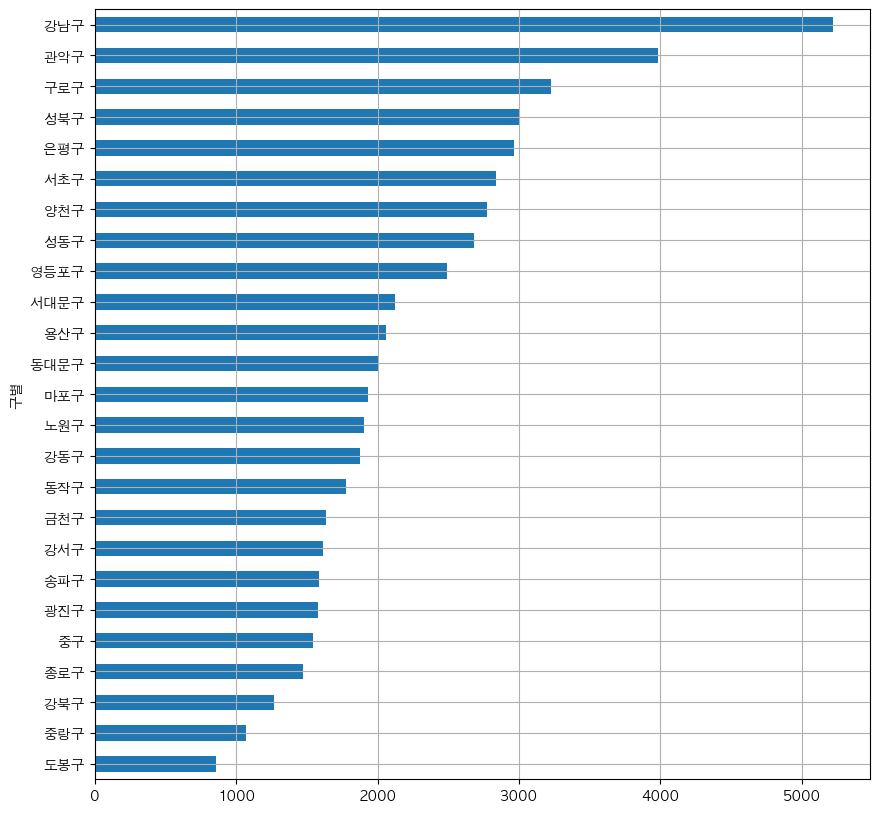

In [42]:
#matplotlib의 기본 폰트가 한글을 지원하지 않기 때문에 폰트를 재설정
#운영체제 별로 폰트의 위치가 다르므로 조건문을 이용해서 설정
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

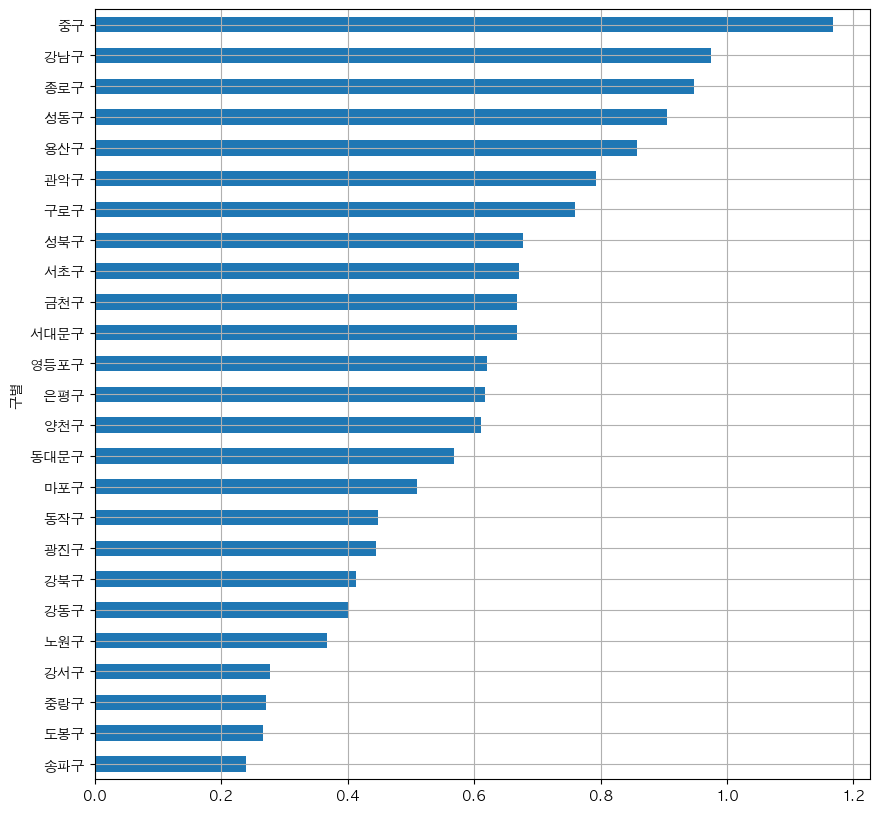

In [44]:
df['cctv비율'] = df['소계'] / df['계'] * 100
df['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

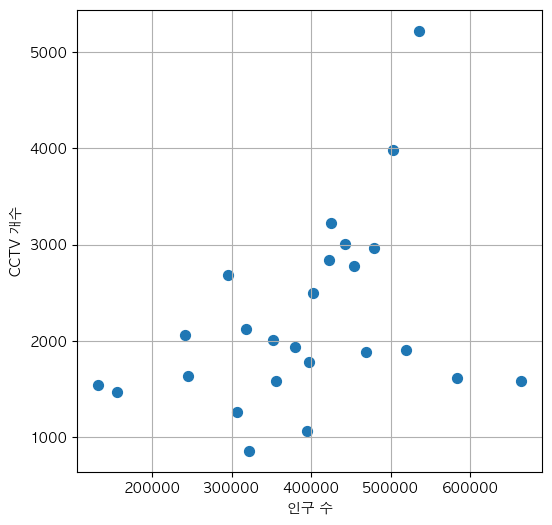

In [46]:
plt.figure(figsize=(6, 6))
plt.scatter(df['계'], df['소계'], s=50)
plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

 
0.002892 x + 1087


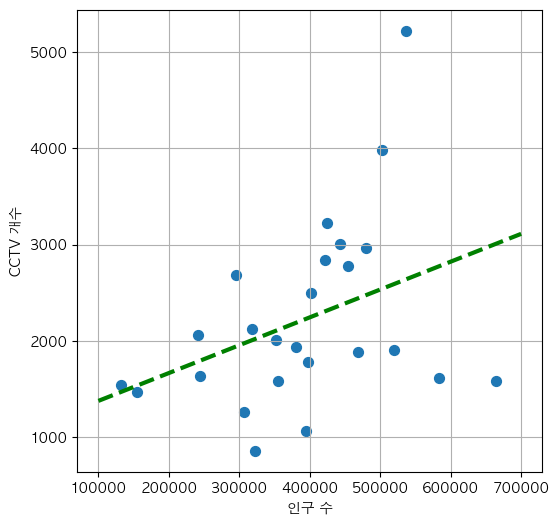

In [49]:
#2개 항목의 단항식을 구하기
fp1 = np.polyfit(df['계'], df['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)

#산점도와 단항식을 같이 출력
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6, 6))
plt.scatter(df['계'], df['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

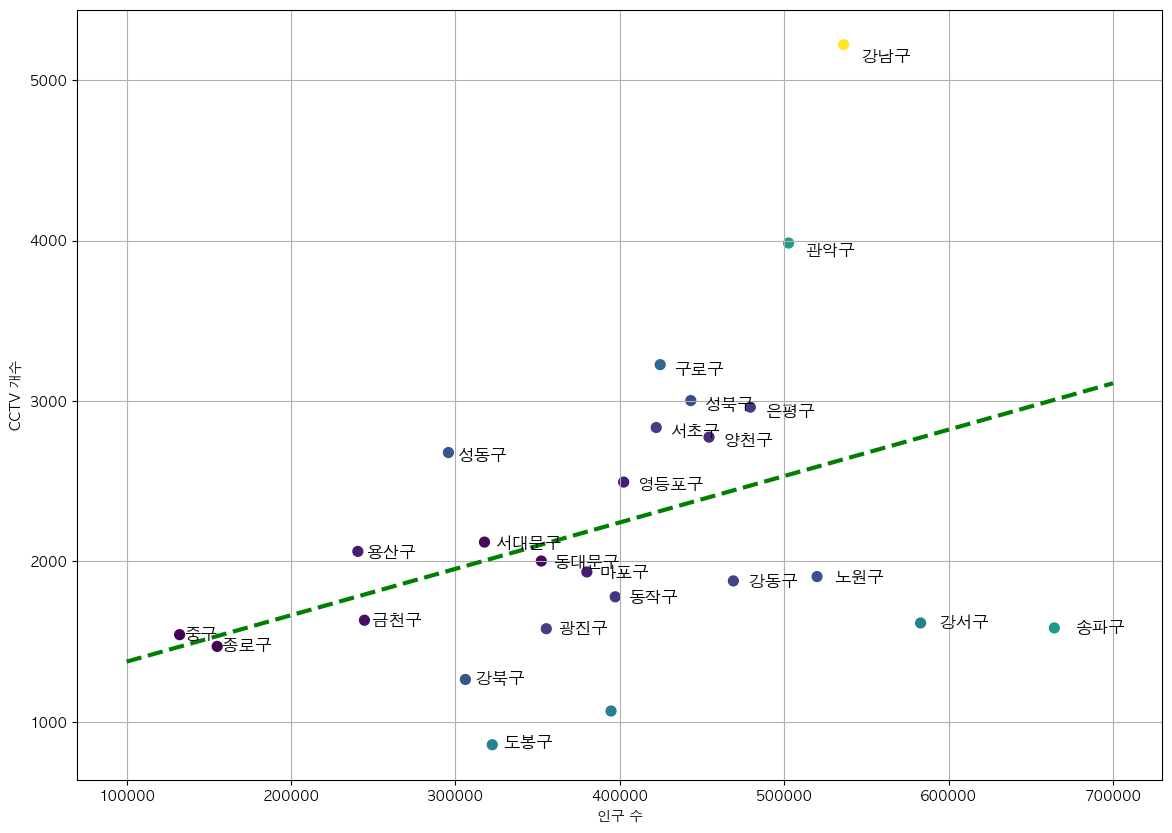

In [54]:
df['오차'] = np.abs(df['소계'] - f1(df['계']))

plt.figure(figsize=(14, 10))
plt.scatter(df['계'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

#좌표를 지정해서 레이블을 출력
for n in range(24):
    plt.text(df['계'][n] * 1.02, df['소계'][n] * 0.98, df.index[n], fontsize=12)

plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

In [59]:
#멀티 인덱스로 사용할 데이터 생성
mul_index = pd.MultiIndex.from_tuples([('cust_1', '2015'), ('cust_1', '2016'),
                                      ('cust_2', '2015'), ('cust_2', '2016')])
data = pd.DataFrame(data=np.arange(16).reshape(4, 4),
                     index=mul_index, columns=['prd_1', 'prd_2', 'prd_3', 'prd_4'],
                     dtype='int')
print(data)

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15


In [61]:
data_stacked = data.stack()
print(data_stacked)

cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int64


In [66]:
data_stacked = data.stack(dropna=False)
print(data_stacked)

cust_1  2015  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2016  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2015  prd_1     8.0
              prd_2     9.0
              prd_3    10.0
              prd_4     NaN
        2016  prd_1    12.0
              prd_2    13.0
              prd_3    14.0
              prd_4     NaN
dtype: float64


In [70]:
print(data_stacked.unstack(level=0)) #0레벨의 인덱스가 컬럼으로 변경됩니다.

            cust_1  cust_2
2015 prd_1     0.0     8.0
     prd_2     1.0     9.0
     prd_3     2.0    10.0
     prd_4     3.0     NaN
2016 prd_1     4.0    12.0
     prd_2     5.0    13.0
     prd_3     6.0    14.0
     prd_4     7.0     NaN


In [78]:
data = pd.read_csv('./data/macrodata.csv')
print(data.head())

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  


In [77]:
##시계열 인덱스 생성
periods = pd.PeriodIndex(year=data['year'], quarter=data['quarter'], name='date')
print(periods)

KeyError: 'year'

In [80]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
#print(columns)

data = data.reindex(columns = columns)
print(data)

item    realgdp  infl  unemp
0      2710.349  0.00    5.8
1      2778.801  2.34    5.1
2      2775.488  2.74    5.3
3      2785.204  0.27    5.6
4      2847.699  2.31    5.2
..          ...   ...    ...
198   13324.600 -3.16    6.0
199   13141.920 -8.79    6.9
200   12925.410  0.94    8.1
201   12901.504  3.37    9.2
202   12990.341  3.56    9.6

[203 rows x 3 columns]


In [82]:
data.index = periods.to_timestamp('D', 'end') #쿼터의 마지막 날을 세부 데이터로 설정
print(data)

item                             realgdp  infl  unemp
date                                                 
1959-03-31 23:59:59.999999999   2710.349  0.00    5.8
1959-06-30 23:59:59.999999999   2778.801  2.34    5.1
1959-09-30 23:59:59.999999999   2775.488  2.74    5.3
1959-12-31 23:59:59.999999999   2785.204  0.27    5.6
1960-03-31 23:59:59.999999999   2847.699  2.31    5.2
...                                  ...   ...    ...
2008-09-30 23:59:59.999999999  13324.600 -3.16    6.0
2008-12-31 23:59:59.999999999  13141.920 -8.79    6.9
2009-03-31 23:59:59.999999999  12925.410  0.94    8.1
2009-06-30 23:59:59.999999999  12901.504  3.37    9.2
2009-09-30 23:59:59.999999999  12990.341  3.56    9.6

[203 rows x 3 columns]


In [85]:
Idata = data.stack().reset_index().rename(columns={0:'value'})
print(Idata)

                             date     item      value
0   1959-03-31 23:59:59.999999999  realgdp   2710.349
1   1959-03-31 23:59:59.999999999     infl      0.000
2   1959-03-31 23:59:59.999999999    unemp      5.800
3   1959-06-30 23:59:59.999999999  realgdp   2778.801
4   1959-06-30 23:59:59.999999999     infl      2.340
..                            ...      ...        ...
604 2009-06-30 23:59:59.999999999     infl      3.370
605 2009-06-30 23:59:59.999999999    unemp      9.200
606 2009-09-30 23:59:59.999999999  realgdp  12990.341
607 2009-09-30 23:59:59.999999999     infl      3.560
608 2009-09-30 23:59:59.999999999    unemp      9.600

[609 rows x 3 columns]


In [88]:
pivoted = Idata.pivot('date', 'item', 'value')
print(pivoted)

item                           infl    realgdp  unemp
date                                                 
1959-03-31 23:59:59.999999999  0.00   2710.349    5.8
1959-06-30 23:59:59.999999999  2.34   2778.801    5.1
1959-09-30 23:59:59.999999999  2.74   2775.488    5.3
1959-12-31 23:59:59.999999999  0.27   2785.204    5.6
1960-03-31 23:59:59.999999999  2.31   2847.699    5.2
...                             ...        ...    ...
2008-09-30 23:59:59.999999999 -3.16  13324.600    6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920    6.9
2009-03-31 23:59:59.999999999  0.94  12925.410    8.1
2009-06-30 23:59:59.999999999  3.37  12901.504    9.2
2009-09-30 23:59:59.999999999  3.56  12990.341    9.6

[203 rows x 3 columns]


/var/folders/bq/22f7j5dn6x5dcpn8t77q8t4h0000gn/T/ipykernel_9196/3478073642.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted = Idata.pivot('date', 'item', 'value')


In [91]:
data = pd.DataFrame({"cust_id":[1, 2, 3, 4], "prod_id":["A", "B", "C", "D"],
                    "pch_cnt":[1, 2, 3, 4], "pch_price":[100, 200, 300, 400],
                    "pch_amt":[10, 20, 30, 40]})
# print(data)
result = pd.melt(data, id_vars=["cust_id", "prod_id"])
print(result)

    cust_id prod_id   variable  value
0         1       A    pch_cnt      1
1         2       B    pch_cnt      2
2         3       C    pch_cnt      3
3         4       D    pch_cnt      4
4         1       A  pch_price    100
5         2       B  pch_price    200
6         3       C  pch_price    300
7         4       D  pch_price    400
8         1       A    pch_amt     10
9         2       B    pch_amt     20
10        3       C    pch_amt     30
11        4       D    pch_amt     40


In [98]:
data = pd.DataFrame({"id":["id1", "id1", "id1", "id2", "id2", "id3"], 
                     "fac_1":["a", "a", "a", "b", "b", "b"],
                     "fac_2":["d", "d", "d", "c", "c", "d"]})
#fac_1과 fac_2의 빈도 분석
print(pd.crosstab(data['fac_1'], data['fac_2'], rownames=['사실'], colnames=['거짓'], normalize=True))
print(pd.crosstab(data.id, [data['fac_1'], data['fac_2']]))

거짓         c         d
사실                    
a   0.000000  0.500000
b   0.333333  0.166667
fac_1  a  b   
fac_2  d  c  d
id            
id1    3  0  0
id2    0  2  0
id3    0  0  1
